<a href="https://colab.research.google.com/github/drewwint/Learning/blob/main/distribution_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions Exercises

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import scipy
from scipy import stats

In [ ]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 3
np.random.seed(RANDOM_SEED)

# Exercise 1: Specifying distributions in code and sampling
## Part 1
Specify three distributions in SciPy
* A Binomial distribution of p=.8 and n=20
* A Poisson distribution with rate 10
* A Normal distribution with mean and standard deviation 20



In [ ]:
binom_d = scipy.stats.binom(20, 0.8)
poisson_d = scipy.stats.poisson(10)
normal_d = scipy.stats.norm(20, 20)

## Part 2
From each of the distributions in Exercise 1 take
* 10 random samples
* 30 random samples
* 10000 random samples

Then
* Calculate the mean of each sample. How closely does it approximate the true mean you would expect?
* Plot the samples. How do the plots differ?

In [ ]:
binom_d_samp = binom_d.rvs(10)
binom_d_samp

array([16, 15, 16, 16, 16, 11, 14, 16, 17, 14])

In [ ]:
poisson_d_samp = poisson_d.rvs(30)

In [ ]:
normal_d_samp = normal_d.rvs(10000)

# Exercise 2: Calculate PMF and PDF
## Part 1
For just the Binomial distribution, calculate the probability mass value of {4, 16, 20} individually. Which value has the highest number, does this match you intuition?


In [ ]:
scipy.stats.binom.pmf([4, 16, 20], 20, 0.8)

array([1.30056978e-08, 2.18199402e-01, 1.15292150e-02])


## Part 2
For the Normal distribution, calculate the PDF from -20 to 60 using the `np.linspace` function to generate the x values. Plot PDF generated. Overlay this plot with the histogram in Exercise 2. Do they match?

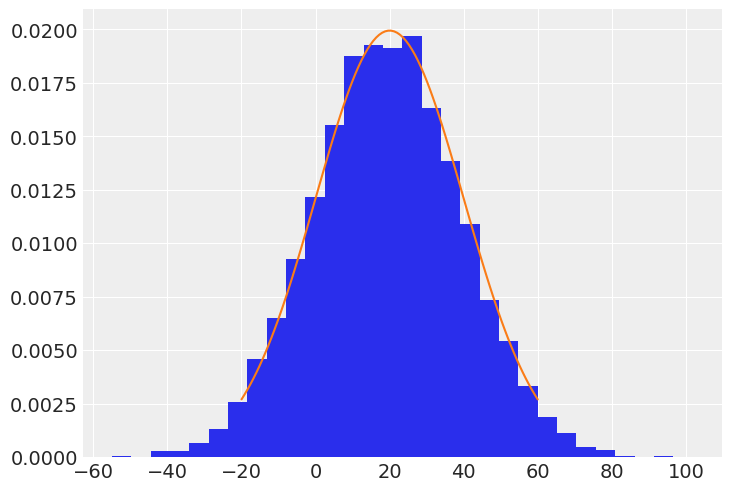

In [ ]:
norm_plt = scipy.stats.norm.pdf(np.linspace(-20, 60, 100), 20, 20)
plt.hist(normal_d_samp, bins=30, density=True)
plt.plot(np.linspace(-20, 60, 100), norm_plt)

# Exercise 3: Reading Docs
## Part 1
Go the course references and find the SciPY and PyMC docs. Find the Poisson distribution in each. Is the parameterization the same?


## I think so


## Part 2
Find two other distributions of the same name in both the PyMC and SciPY docs and compare the parameters. Do they match?

## I think so

# Exercise 4: Connecting the two spaces
## Part 1
<center> <img src="https://github.com/drewwint/Learning/blob/main/Intuative_Bayes/IntroductoryCourse-main/IntroductoryCourse-main/lesson_code/4_Distributions/img/ConnectedSpaces.png?raw=1" width="1200"/></center>

Recreate the plot above using the code in the course, however update the parameter space so the observed space distribution mean is around 100


In [ ]:
beta_dist = stats.beta(18,30)
conversion_rate_samples = beta_dist.rvs(10000)
actual_conversion_samples = stats.binom(p=conversion_rate_samples,n=286).rvs(10000)

/tmp/ipython-input-4139831285.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


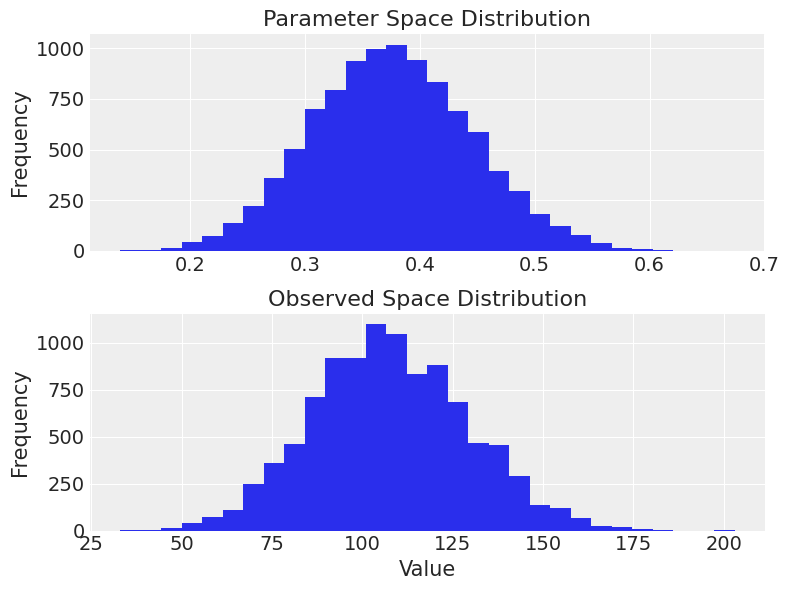

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].hist(conversion_rate_samples, bins=30, label='Parameter Space')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Parameter Space Distribution')

axes[1].hist(actual_conversion_samples, bins=30, label='Observed Space')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Observed Space Distribution')

plt.tight_layout()
plt.show()


## Part 2
**Note**: This exercise is designed to be challenging. If you get this exercise however you will be very well prepared for the lesson thereafter

Let's say we sample the heights of people and we observe a Normal Distribution in centimeters. Perform the following tasks using SciPy:

**Task 1**

Specify a Normal distribution with 150 cm as the mean and 20 cm `N(150, 20)` as the standard deviation. Take 10000 samples and plot the observed values



(array([1.97680053e-05, 1.97680053e-05, 1.97680053e-05, 7.90720210e-05,
        1.97680053e-04, 4.74432126e-04, 1.04770428e-03, 2.03610454e-03,
        2.84659276e-03, 4.92223331e-03, 7.55137801e-03, 1.05956508e-02,
        1.28294354e-02, 1.53399721e-02, 1.75539887e-02, 1.97680053e-02,
        1.93924132e-02, 1.83842449e-02, 1.70004845e-02, 1.31457235e-02,
        1.09910109e-02, 8.89560236e-03, 5.71295352e-03, 4.05244108e-03,
        2.39192864e-03, 1.10700829e-03, 6.91880184e-04, 3.75592100e-04,
        1.77912047e-04, 5.93040158e-05]),
 array([ 68.04528517,  73.10396452,  78.16264387,  83.22132323,
         88.28000258,  93.33868193,  98.39736128, 103.45604063,
        108.51471999, 113.57339934, 118.63207869, 123.69075804,
        128.7494374 , 133.80811675, 138.8667961 , 143.92547545,
        148.98415481, 154.04283416, 159.10151351, 164.16019286,
        169.21887222, 174.27755157, 179.33623092, 184.39491027,
        189.45358962, 194.51226898, 199.57094833, 204.62962768,
      

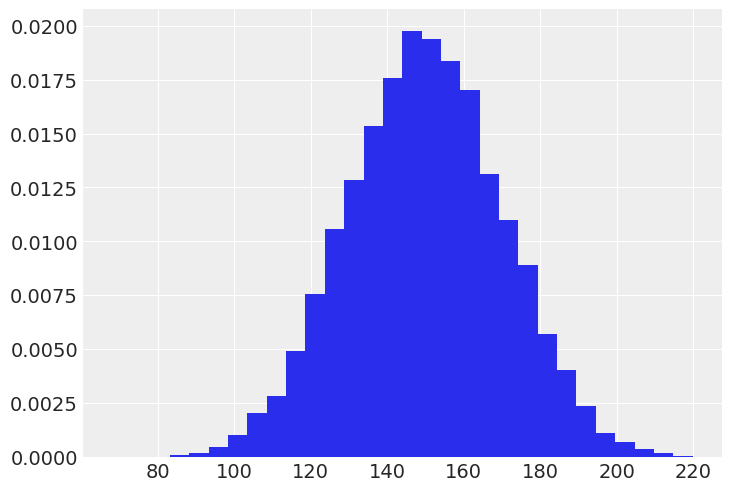

In [ ]:
normal_d = scipy.stats.norm(150, 20)
normal_d_samp = normal_d.rvs(10000)
plt.hist(normal_d_samp, bins=30, density=True)

**Task 2**

Specify a Normal distribution but this time

* The mean is specified by another Normal distribution of  `N(150, 5)`
* The standard deviation is 20 cm
  
Take 10000 samples and plot both distributions. Label which one is the parameter distribution and which one is the observed distribution. *hint* You may run into shape issues.

Change the mean of the parameter distribution to 100 cm and see what happens. Do the same for the standard deviation of the parameter distribution.


/tmp/ipython-input-2889294938.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


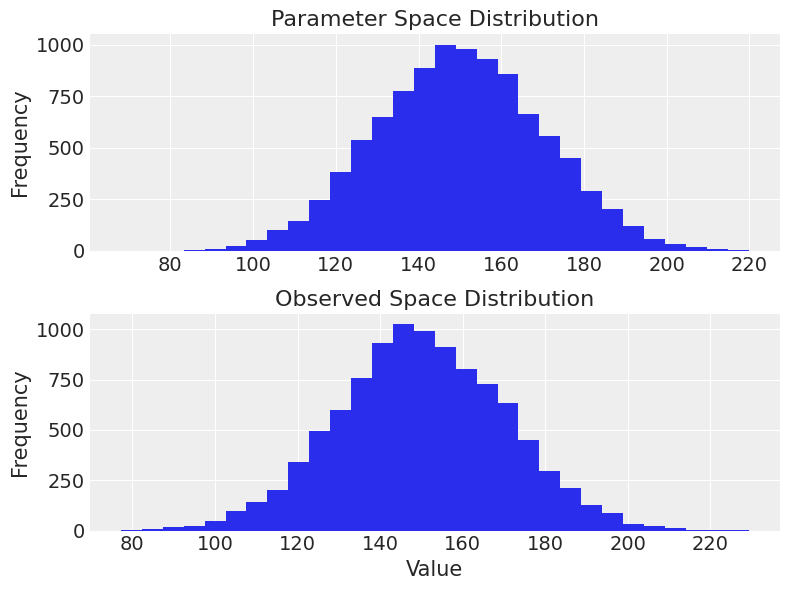

In [ ]:
normal_d2 = scipy.stats.norm(np.mean(normal_d_samp), 20)
normal_d2_samp = normal_d2.rvs(10000)

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].hist(normal_d_samp, bins=30, label='Parameter Space')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Parameter Space Distribution')

axes[1].hist(normal_d2_samp, bins=30, label='Observed Space')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Observed Space Distribution')

plt.tight_layout()
plt.show()

# plt.hist(normal_d2_samp, bins=30, density=True)

In [ ]:
np.mean(normal_d_samp)

np.float64(149.97756358583922)


**Task 3**

Specify a Normal distribution but this time

* The mean is specified by another Normal distribution of  `N(150, 5)`
* The standard deviation is a HalfNormal with standard deviation 15

Take 10000 samples and plot all three distributions. Write down conceptually why we are using a HalfNormal for standard deviation instead of a full normal. *Hint* Try using a Full normal for standard deviation and see what happens

/tmp/ipython-input-939302881.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


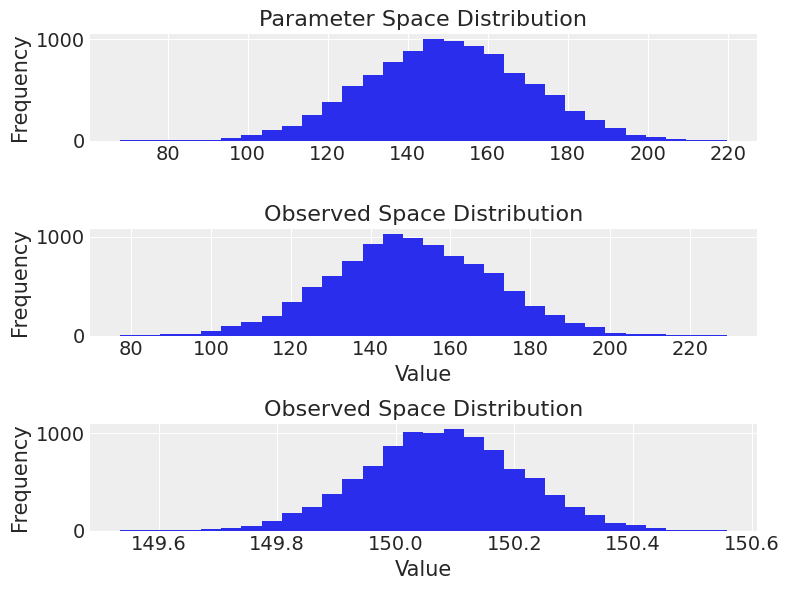

In [ ]:
normal_d3 = scipy.stats.norm(150, 5)
normal_d3_samp = normal_d3.rvs(10000)
sd = scipy.stats.halfnorm(loc=15).stats('v')**2
normal_d4 = scipy.stats.norm(normal_d3_samp.mean(), sd)
normal_d4_samp = normal_d4.rvs(10000)

fig, axes = plt.subplots(3, 1, figsize=(8, 6))
axes[0].hist(normal_d_samp, bins=30, label='Parameter Space')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Parameter Space Distribution')

axes[1].hist(normal_d2_samp, bins=30, label='Observed Space')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Observed Space Distribution')

axes[2].hist(normal_d4_samp, bins=30, label='Observed Space')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Observed Space Distribution')

plt.tight_layout()
plt.show()

np.float64(0.13204518983418836)